In [8]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [9]:
t_max = 10*np.pi
delta = 0
omega_max = 1
num_points = 500

times = np.linspace(0, t_max, num_points)

In [10]:
def omega(t, omega_max, t_max, sign=1):
    sigma = t_max/8
    return omega_max * np.exp(-(t - (t_max + sign*sigma)/2)**2 / (2*sigma**2))

def omega_12g(t, omega_max, t_max):
    return omega(t, omega_max, t_max)

def omega_23g(t, omega_max, t_max):
    return omega(t, omega_max, t_max, -1)

In [11]:
def hamiltonian(times, omega12, omega23, delta):
    H = np.zeros((len(times), 3, 3))
    H[:, 0, 1] = -omega12
    H[:, 1, 0] = -omega12
    H[:, 1, 2] = -omega23
    H[:, 2, 1] = -omega23
    H[:, 1, 1] = delta
    return H

In [12]:
H = hamiltonian(times, omega_12g(times, omega_max, t_max), omega_23g(times, omega_max, t_max), delta)

In [13]:
eigenenergies = np.linalg.eigvalsh(H)

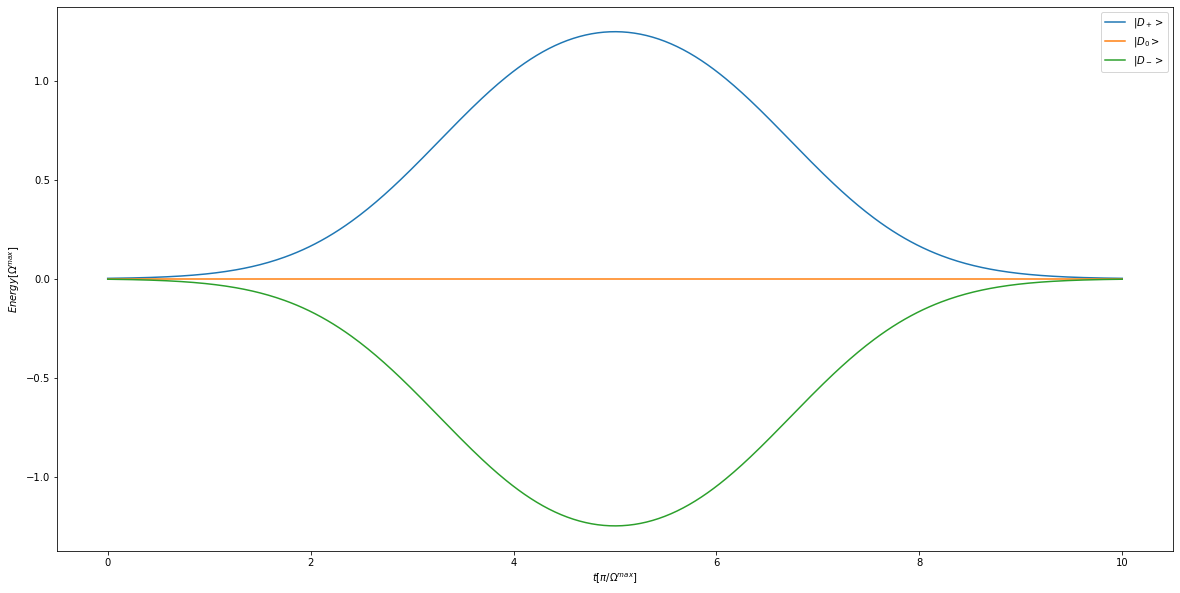

In [14]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(times/(np.pi/omega_max), eigenenergies[:, 2], label=r'$|D_+>$')
ax.plot(times/(np.pi/omega_max), eigenenergies[:, 1], label=r'$|D_0>$')
ax.plot(times/(np.pi/omega_max), eigenenergies[:, 0], label=r'$|D_->$')
ax.set_xlabel(r'$t[\pi/\Omega^{max}]$') 
ax.set_ylabel(r'$Energy[\Omega^{max}]$')
ax.legend()